## E Navaneet Kumar

### Problem 3

In [1]:
import pandas as pd
new_file_path = 'EE627A_HW2_Q3.csv'
new_time_series_data = pd.read_csv(new_file_path, header=None, names=['Value'])

new_time_series_data.head()


,Value
0,1.0374
1,1.0372
2,1.0372
3,1.0370
4,1.0369


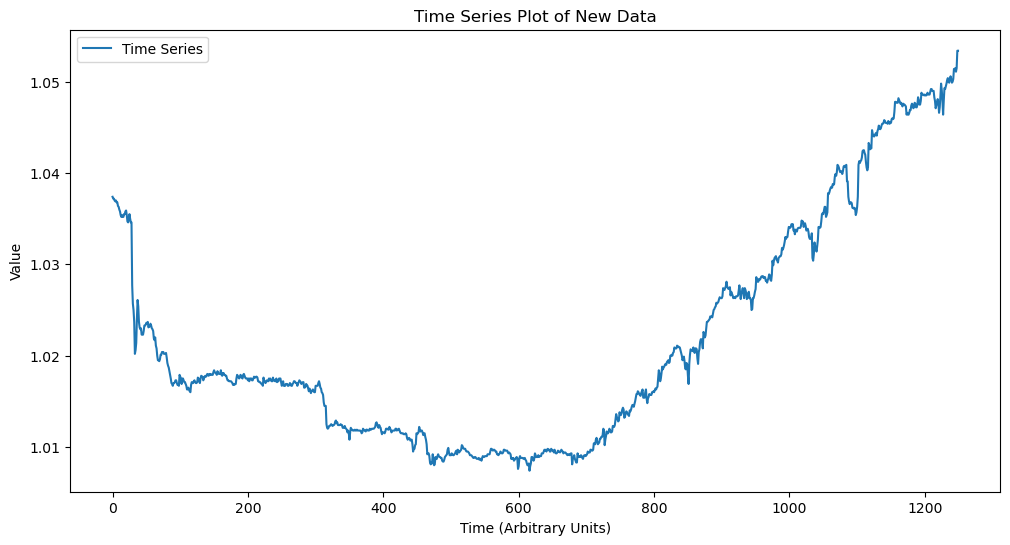

In [2]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(new_time_series_data['Value'], label='Time Series')
plt.title('Time Series Plot of New Data')
plt.xlabel('Time (Arbitrary Units)')
plt.ylabel('Value')
plt.legend()
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller
new_adf_test_result = adfuller(new_time_series_data['Value'])

new_adf_test_statistic = new_adf_test_result[0]
new_p_value = new_adf_test_result[1]
new_critical_values = new_adf_test_result[4]

new_adf_test_statistic, new_p_value, new_critical_values


(0.7824805016956884,
 0.991348042049954,
 {'1%': -3.435638861796935,
  '5%': -2.863875547501718,
  '10%': -2.5680134763122906})

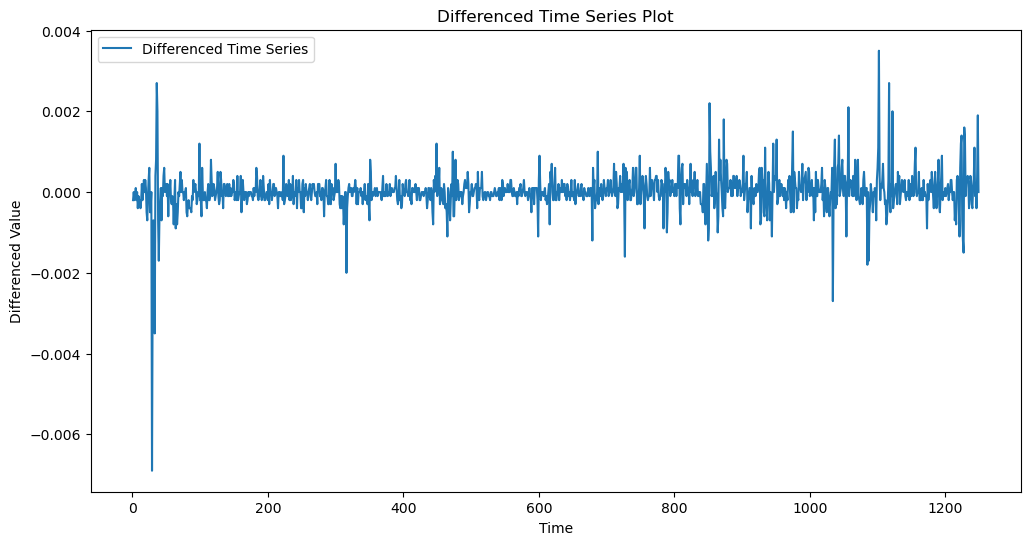

(-9.962655256316369,
 2.3512147127736604e-17,
 {'1%': -3.435638861796935,
  '5%': -2.863875547501718,
  '10%': -2.5680134763122906})

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
differenced_series = new_time_series_data['Value'].diff().dropna()

adf_test_result_diff = adfuller(differenced_series)

adf_test_statistic_diff = adf_test_result_diff[0]
p_value_diff = adf_test_result_diff[1]
critical_values_diff = adf_test_result_diff[4]

plt.figure(figsize=(12, 6))
plt.plot(differenced_series, label='Differenced Time Series')
plt.title('Differenced Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

adf_test_statistic_diff, p_value_diff, critical_values_diff


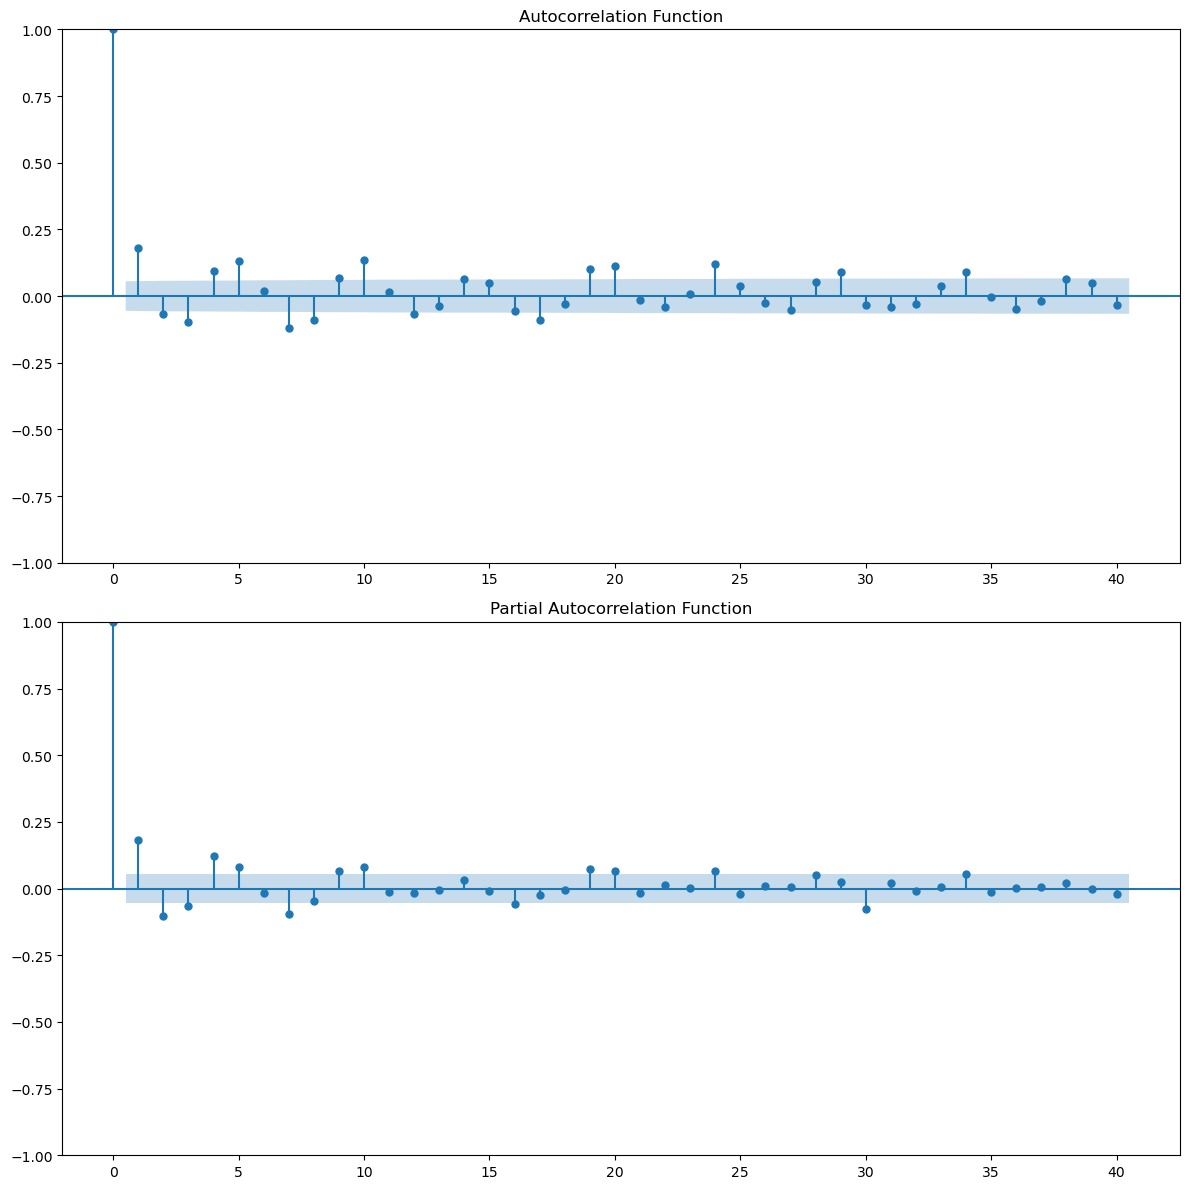

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# ACF plot 
plot_acf(differenced_series, ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function')

# PACF plot 
plot_pacf(differenced_series, ax=ax2, lags=40, method='ywm')
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [6]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def fit_evaluate_models(data, orders):
    results = []
    for order in orders:
        try:
            model = ARIMA(data, order=order)
            model_fit = model.fit()
            results.append((order, model_fit.aic))
        except Exception as e:
            results.append((order, np.inf))
            print(f"Failed to fit model with order {order}: {e}")
    return results

arma_orders_diff = [
    (1, 0),  # ARMA(1,0) -> AR(1)
    (0, 1),  # ARMA(0,1) -> MA(1)
    (1, 1),  # ARMA(1,1)
    (2, 0),  # ARMA(2,0) -> AR(2)
    (0, 2),  # ARMA(0,2) -> MA(2)
    (2, 2)   # ARMA(2,2)
]

arma_diff_model_results = fit_evaluate_models(differenced_series, [(p, 0, q) for p, q in arma_orders_diff])

sorted_arma_diff_results = sorted(arma_diff_model_results, key=lambda x: x[1])

sorted_arma_diff_results


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

[((2, 0, 2), -15634.020021155684),
 ((2, 0, 0), -15612.125736809267),
 ((0, 0, 1), -15606.542040020653),
 ((0, 0, 2), -15605.230555614558),
 ((1, 0, 1), -15604.827166228932),
 ((1, 0, 0), -15600.331213983878)]

The ARMA(2,2) model has the lowest AIC value, suggesting it might be the best model among the ones tested in terms of balancing model fit and complexity.Given these results, the ARMA(2,2) model appears to be the best predictive model for the differenced series among the ones tested.